In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
df = pd.read_csv("Titanic.csv")

In [5]:
df = df.dropna()

In [6]:
# Drop irrelevant columns
df = df.drop(columns=['Name', 'Ticket', 'Cabin'])

In [7]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,2,1,1,female,38.0,1,0,71.2833,C
3,4,1,1,female,35.0,1,0,53.1000,S
6,7,0,1,male,54.0,0,0,51.8625,S
10,11,1,3,female,4.0,1,1,16.7000,S
11,12,1,1,female,58.0,0,0,26.5500,S


In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [9]:
# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\cheta\AppData\Local\Temp\ipykernel_9636\1230447520.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\cheta\AppData\Local\Temp\ipykernel_9636\1230447520.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [10]:
# Convert categorical variables to numerical
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

C:\Users\cheta\AppData\Local\Temp\ipykernel_9636\1976644067.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',data=df, palette='hls')


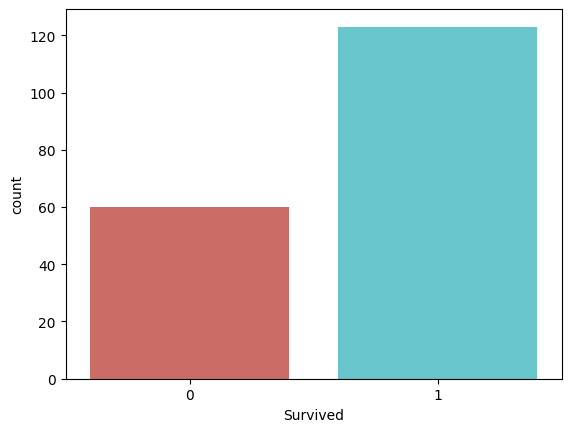

In [11]:
sns.countplot(x='Survived',data=df, palette='hls')
plt.show()

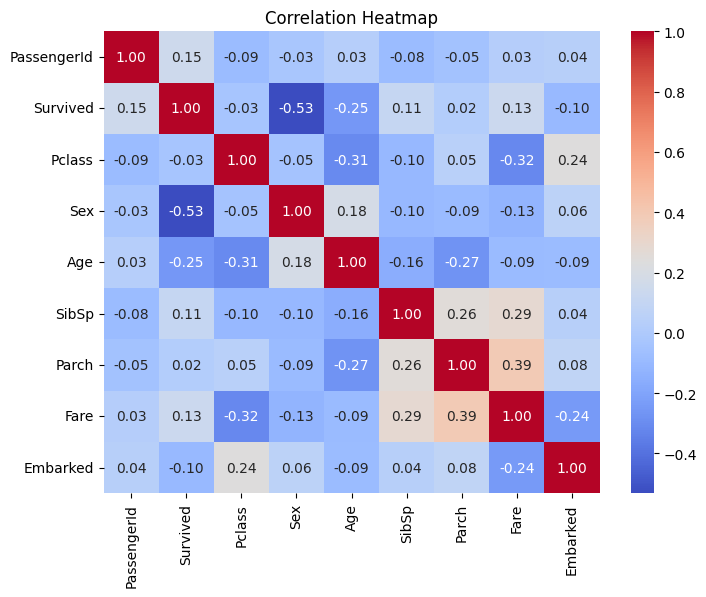

In [12]:
# Creating a heatmap to visualize correlations
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [13]:
# Select features and target
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']

In [14]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [17]:
# Predictions
y_pred = model.predict(X_test)

In [18]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

Accuracy: 0.7297
Confusion Matrix:
 [[ 8  6]
 [ 4 19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.57      0.62        14
           1       0.76      0.83      0.79        23

    accuracy                           0.73        37
   macro avg       0.71      0.70      0.70        37
weighted avg       0.72      0.73      0.72        37



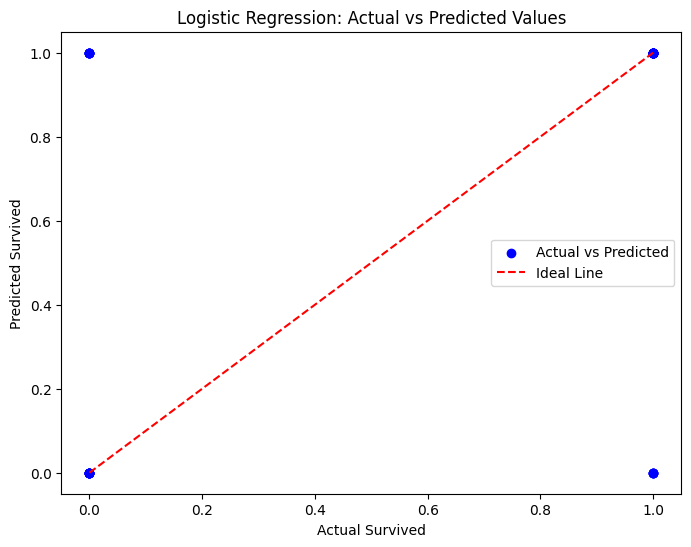

In [19]:
# Plot Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Line')

# Customize the plot
plt.xlabel('Actual Survived')
plt.ylabel('Predicted Survived')
plt.title('Logistic Regression: Actual vs Predicted Values')
plt.legend()

# Display the plot
plt.show()
